In [63]:
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import seaborn as sn
from datetime import datetime

In [64]:

x, y = np.random.uniform(-180,180,size=600), np.random.uniform(-90, 90, size=600)

points = list(zip(x,y))


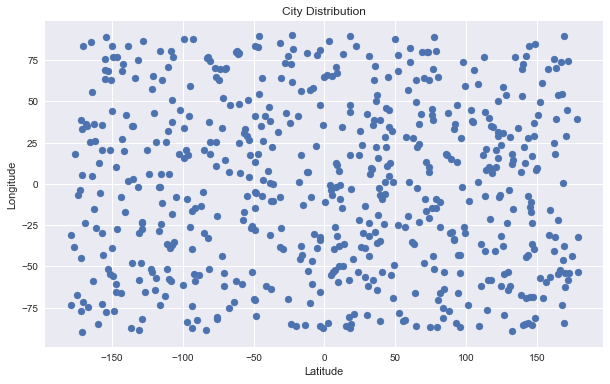

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)

plt.title("City Distribution")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

In [66]:
city_df = pd.DataFrame(points)

city_df= city_df.rename(columns={0:'Lat',1:'Lng'})
city_list = []
country_list = []


for i in range(0,len(city_df['Lat'])):
    x = city_df['Lat'][i]
    y = city_df['Lng'][i]

    city = citipy.nearest_city(x, y)
    city_list.append(city.city_name)
    country_list.append(city.country_code.upper())
    
city_df['City'] = city_list
city_df['Country'] = country_list
city_df.head()

,Lat,Lng,City,Country
0,-38.835650,46.791351,tsihombe,MG
1,-116.221667,-1.636815,hermanus,ZA
2,-116.736019,-28.798833,ushuaia,AR
3,-171.701913,-44.702279,ushuaia,AR
4,-54.753320,-7.591619,cape town,ZA


In [67]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="
api_key = "18c63e24eb1fec74900cd4a019a75768"


In [68]:
cloud_list = []
date_list = [] 
humidity_list = []
maxtemp_list = []
windspeed_list = []

with open('WeatherPyLog.txt','w') as output:
    output.write("WeatherPy Log: \n\r")
    
    for index, city in enumerate(city_list):
        
        
        str = "&q=" + city
       
        response = requests.get(url + api_key + str)
        output.write("URL: " + url + api_key + str+"\n\r")
        output.write("Retrieving Record: " + "{}".format(index+1) + ": "+city +" data -----------------\n\r")
        
        if response.ok:
            weatherdata = response.json()
        
           # date_list.append(weatherdata['dt'])
            currentdate = datetime.fromtimestamp(weatherdata['dt']).strftime('%m/%d/%Y')
            date_list.append(currentdate)
            cloud_list.append(weatherdata['clouds']['all'])
            humidity_list.append(weatherdata['main']['humidity'])
            maxtemp_list.append(weatherdata['main']['temp_max'])
            windspeed_list.append(weatherdata['wind']['speed'])
            5           
        else:            
            date_list.append(np.nan)
            cloud_list.append(np.nan)
            humidity_list.append(np.nan)
            maxtemp_list.append(np.nan)
            windspeed_list.append(np.nan)
            
            output.write(city +" data not found-----------------\n\r")

city_df['Date'] = date_list
city_df['Cloudiness'] = cloud_list
city_df['Humidity'] = humidity_list
city_df['Max Temp'] = maxtemp_list
city_df['Wind Speed'] = windspeed_list

city_df.head()

,Lat,Lng,City,Country,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,-38.835650,46.791351,tsihombe,MG,NaN,NaN,NaN,NaN,NaN
1,-116.221667,-1.636815,hermanus,ZA,03/19/2018,0.0,99.0,48.5,2.95
2,-116.736019,-28.798833,ushuaia,AR,03/19/2018,75.0,86.0,41.0,33.33
3,-171.701913,-44.702279,ushuaia,AR,03/19/2018,75.0,86.0,41.0,33.33
4,-54.753320,-7.591619,cape town,ZA,03/19/2018,0.0,82.0,60.8,11.41


In [69]:
city_df = city_df.dropna(how='any')

city_df = city_df.head(500)
city_df.head()

,Lat,Lng,City,Country,Date,Cloudiness,Humidity,Max Temp,Wind Speed
1,-116.221667,-1.636815,hermanus,ZA,03/19/2018,0.0,99.0,48.50,2.95
2,-116.736019,-28.798833,ushuaia,AR,03/19/2018,75.0,86.0,41.00,33.33
3,-171.701913,-44.702279,ushuaia,AR,03/19/2018,75.0,86.0,41.00,33.33
4,-54.753320,-7.591619,cape town,ZA,03/19/2018,0.0,82.0,60.80,11.41
5,147.112033,-68.319219,qaanaaq,GL,03/19/2018,0.0,98.0,-17.21,11.23


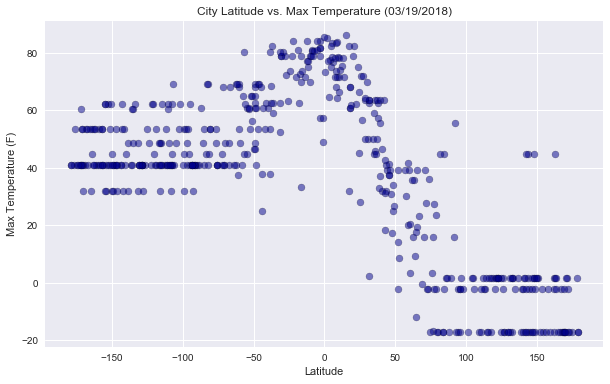

In [70]:

plt.figure(figsize=(10,6))
plt.scatter(city_df['Lat'], city_df['Max Temp'],color = 'DarkBlue',edgecolor='Black',alpha=0.5)
sn.set()

plt.title("City Latitude vs. Max Temperature ("+city_df.iloc[0]['Date']+")")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('CityLat_MaxTemperature.png')
plt.show()

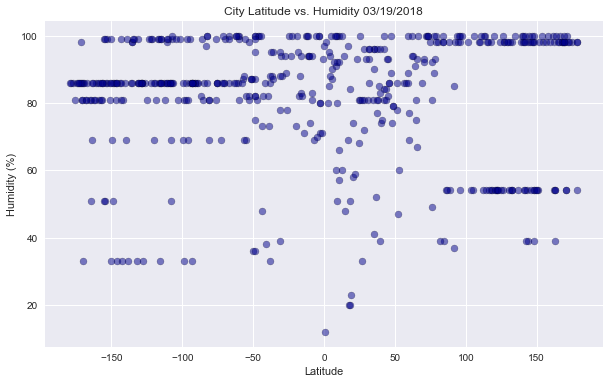

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(city_df['Lat'], city_df['Humidity'],color = 'DarkBlue',edgecolor='Black',alpha=0.5)
sn.set()

plt.title("City Latitude vs. Humidity "+city_df.iloc[0]['Date'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('CityLat_Humidity.png')
plt.show()

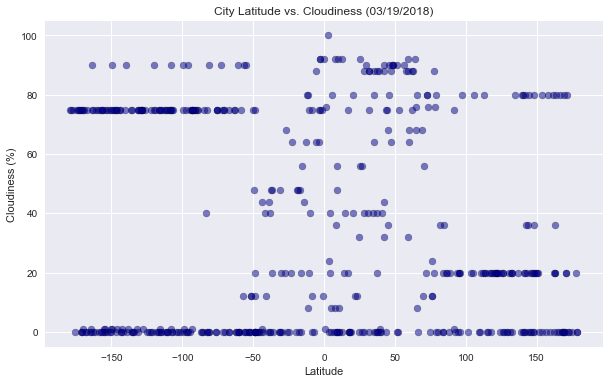

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(city_df['Lat'], city_df['Cloudiness'],color = 'DarkBlue',edgecolor='Black',alpha=0.5)
sn.set()

plt.title("City Latitude vs. Cloudiness ("+city_df.iloc[0]['Date'] +")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('CityLat_Cloudiness.png')
plt.show()

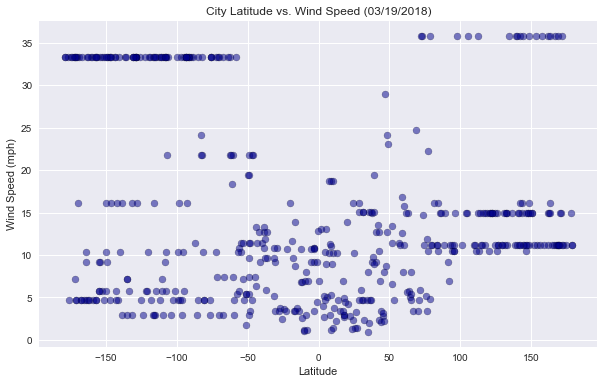

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(city_df['Lat'], city_df['Wind Speed'],color = 'DarkBlue',edgecolor='Black',alpha=0.5)
sn.set()

plt.title("City Latitude vs. Wind Speed ("+city_df.iloc[0]['Date']+")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('CityLat_WindSpeed.png')
plt.show()

In [74]:
city_df.to_csv("WeatherPyOutput.csv", sep=',', encoding='utf-8')